# Data Analysis of Android and iOS Apps

**Idea of doing the project:**

- The project will give information about the different parameters of the applications available on the Google Play Store and Apple Store
- The aim is to come out with the types and features of an application that will help the companies to generate more revenues through their applications 

In [12]:
def explore(dataset,header=True):
    opened_file=open(dataset)
    from csv import reader
    read_file=reader(opened_file)
    data=list(read_file)
    if header:
        return data[1:]
    else:
        return data
    
google_data=explore('./my_datasets/googleplaystore.csv',False)
ios_data=explore('./my_datasets/AppleStore.csv',False)

In [38]:
def explore_data(dataset,start,end,rows_and_columns=False):
    dataset_slice=dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')
        
    if rows_and_columns:
        print('No. of rows:',len(dataset))
        print('No. of columns:',len(dataset[0]))
        
explore_data(google_data,0,5,True)
print('\n')
explore_data(ios_data,0,5,True)
    

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


No. of rows: 10841
No. of columns: 13


['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_cou

In [15]:
#deleting wrong row in the dataset due to one missing entry in the row 10473
del google_data[10473]
#run it only once

## Duplicates in Google Play Dataset

- Google Play dataset has many duplicates as we shall see
- We need to remove the duplicates to clean the dataset

In [17]:
duplicates_list=[]
unique_list=[]

for row in google_data[1:]:
    name=row[0]
    if name in unique_list:
        duplicates_list.append(name)
    else:
        unique_list.append(name)
        
print('No. of unique apps:',len(unique_list))
print('No. of duplicate apps:',len(duplicates_list))

No. of unique apps: 9659
No. of duplicate apps: 1181


## Duplicates removal criteria
- We will remove the duplicate apps based on the Ratings column in the rows
- We will kepp the app with highest rating(because that will be the latest) and remove others

In [20]:
reviews_max={}
for row in google_data[1:]:
    name=row[0]
    n_review=float(row[3])
    if name in reviews_max:
        if n_review > reviews_max[name]:
            reviews_max[name]=n_review
    if name not in reviews_max:
        reviews_max[name]=n_review
        
print(len(reviews_max))

9659


In [22]:
android_clean=[]
already_added=[]

for row in google_data[1:]:
    name=row[0]
    n_review=float(row[3])
    if name not in already_added and n_review == reviews_max[name]:
        android_clean.append(row)
        already_added.append(name)
        
print(len(already_added))
print(len(android_clean))

9659
9659


## Removal of app names that are Non-English

- For doing so we first make a function that will identify whether a given string is English or Non-English
- For this we will loop over every character in string and check whether the ASCII value is between 0 and 127

In [39]:
def check_english(string):
    count=0
    for character in string:
        ascii_value=ord(character)
        if ascii_value > 127:
            count+=1
            if count > 3:
                return False
        
    return True

print(check_english('Instagram'))
print(check_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_english('Docs To Go™ Free Office Suite'))
print(check_english('Instachat 😜'))
            

True
False
True
True


In [40]:
google_data_clean=[]
for row in android_clean:
    name=row[0]
    if check_english(name):
        google_data_clean.append(row)
        
ios_data_clean=[]
for row in ios_data[1:]:
    name=row[2]
    if check_english(name):
        ios_data_clean.append(row)
        
print(len(google_data_clean))
print(len(ios_data_clean))

9614
6183


## Removal of Apps that are not free 

- We will remove the apps that are not free to download and install
- As our main source of revenue from these apps is the in-app ads 

In [41]:
google_data_free=[]
for row in google_data_clean:
    price=row[7]
    if price == '0':
        google_data_free.append(row)
        
        
ios_data_free=[]
for row in ios_data_clean:
    price=float(row[5])
    if price == 0.0:
        ios_data_free.append(row)
        
print(len(google_data_free))
print(len(ios_data_free))
    

8864
3222


## Strategy for the Analysis

- We will make the frequency table for `Genres` in the dataset
- We will check which `Genres` are popular in both android and ios stores

In [100]:
# function for creating frequency table of any column in terms of percentage
def freq_table(dataset,index):
    content_freq={}
    for row in dataset:
        value=row[index]
        if value in content_freq:
            content_freq[value]+=1
        else:
            content_freq[value]=1
    
    for key in content_freq:
        content_freq[key]=(content_freq[key]/len(dataset))*100
        
    return content_freq
            
google_freq_table_1=freq_table(google_data_free,1)
google_freq_table_2=freq_table(google_data_free,9)
ios_freq_table=freq_table(ios_data_free,12)
print(google_freq_table_1)
print('\n')
print(google_freq_table_2)
print('\n')
print(ios_freq_table)


{'ART_AND_DESIGN': 0.6430505415162455, 'AUTO_AND_VEHICLES': 0.9250902527075812, 'BEAUTY': 0.5979241877256317, 'BOOKS_AND_REFERENCE': 2.1435018050541514, 'BUSINESS': 4.591606498194946, 'COMICS': 0.6204873646209386, 'COMMUNICATION': 3.2378158844765346, 'DATING': 1.861462093862816, 'EDUCATION': 1.1620036101083033, 'ENTERTAINMENT': 0.9589350180505415, 'EVENTS': 0.7107400722021661, 'FINANCE': 3.7003610108303246, 'FOOD_AND_DRINK': 1.2409747292418771, 'HEALTH_AND_FITNESS': 3.0798736462093865, 'HOUSE_AND_HOME': 0.8235559566787004, 'LIBRARIES_AND_DEMO': 0.9363718411552346, 'LIFESTYLE': 3.9034296028880866, 'GAME': 9.724729241877256, 'FAMILY': 18.907942238267147, 'MEDICAL': 3.531137184115524, 'SOCIAL': 2.6624548736462095, 'SHOPPING': 2.2450361010830324, 'PHOTOGRAPHY': 2.944494584837545, 'SPORTS': 3.395758122743682, 'TRAVEL_AND_LOCAL': 2.33528880866426, 'TOOLS': 8.461191335740072, 'PERSONALIZATION': 3.3167870036101084, 'PRODUCTIVITY': 3.892148014440433, 'PARENTING': 0.6543321299638989, 'WEATHER': 

In [56]:
# function that will take a dataset and index and convert it into a list of tuples that will be sorted decreasingly

def display_table(dataset,index):
    table=freq_table(dataset,index)
    table_display=[]
    for key in table:
        value_tuple=(table[key],key)
        table_display.append(value_tuple)
    
    table_sorted=sorted(table_display,reverse=True)
    
    return table_sorted
    
google_freq_sorted_1=display_table(google_data_free,1)
google_freq_sorted_2=display_table(google_data_free,9)
ios_freq_sorted=display_table(ios_data_free,12)

print(google_freq_sorted_1)
print('\n')
print(google_freq_sorted_2)
print('\n')
print(ios_freq_sorted)

[(18.907942238267147, 'FAMILY'), (9.724729241877256, 'GAME'), (8.461191335740072, 'TOOLS'), (4.591606498194946, 'BUSINESS'), (3.9034296028880866, 'LIFESTYLE'), (3.892148014440433, 'PRODUCTIVITY'), (3.7003610108303246, 'FINANCE'), (3.531137184115524, 'MEDICAL'), (3.395758122743682, 'SPORTS'), (3.3167870036101084, 'PERSONALIZATION'), (3.2378158844765346, 'COMMUNICATION'), (3.0798736462093865, 'HEALTH_AND_FITNESS'), (2.944494584837545, 'PHOTOGRAPHY'), (2.7978339350180503, 'NEWS_AND_MAGAZINES'), (2.6624548736462095, 'SOCIAL'), (2.33528880866426, 'TRAVEL_AND_LOCAL'), (2.2450361010830324, 'SHOPPING'), (2.1435018050541514, 'BOOKS_AND_REFERENCE'), (1.861462093862816, 'DATING'), (1.7937725631768955, 'VIDEO_PLAYERS'), (1.3989169675090252, 'MAPS_AND_NAVIGATION'), (1.2409747292418771, 'FOOD_AND_DRINK'), (1.1620036101083033, 'EDUCATION'), (0.9589350180505415, 'ENTERTAINMENT'), (0.9363718411552346, 'LIBRARIES_AND_DEMO'), (0.9250902527075812, 'AUTO_AND_VEHICLES'), (0.8235559566787004, 'HOUSE_AND_HOME

## Recomending App for App Store based on the average user ratings specific to a `Genre`

- We will make a function that will print the average user ratings of a specific `Genre`
- For this will use our `ios_freq_table` 

In [78]:
# function for printing average installs of a specific genre in App Store

for genre in ios_freq_table:
    total = 0
    len_genre = 0
    for app in ios_data_free:
        genre_app = app[-5]
        if genre_app == genre:            
            n_ratings = float(app[6])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)
    
# from results i would like to suggest Social Networking and Navigation

Productivity : 21028.410714285714
Weather : 52279.892857142855
Shopping : 26919.690476190477
Reference : 74942.11111111111
Finance : 31467.944444444445
Music : 57326.530303030304
Utilities : 18684.456790123455
Travel : 28243.8
Social Networking : 71548.34905660378
Sports : 23008.898550724636
Health & Fitness : 23298.015384615384
Games : 22788.6696905016
Food & Drink : 33333.92307692308
News : 21248.023255813954
Book : 39758.5
Photo & Video : 28441.54375
Entertainment : 14029.830708661417
Business : 7491.117647058823
Lifestyle : 16485.764705882353
Education : 7003.983050847458
Navigation : 86090.33333333333
Medical : 612.0
Catalogs : 4004.0


## Correcting the `Installs` column in Google Dataset for getting average number of installs specific to a `Genre`

- We will remove the `,` and `+` from the string in the `Installs` column
- After that we will convert the `string` to `int`
- We will be using the `freq_table()` function for getting the `Genres` in the `Category` column of Google Dataset

In [80]:
# we will use google_freq_table
google_freq_table=freq_table(google_data_free,1)
for category in google_freq_table:
    total=0
    len_category=0
    for row in google_data_free:
        genre=row[1]
        if genre == category:
            string=row[5]
            string=string.replace(',','')
            string=string.replace('+','')
            total=+float(string)
            len_category+=1
    avg_installs=total/len_category
    print(category,':',avg_installs)
    
# from results i would like to suggest Libraries_and_demo and Entertainment

ART_AND_DESIGN : 1.7543859649122806
AUTO_AND_VEHICLES : 1.2195121951219512
BEAUTY : 1886.7924528301887
BOOKS_AND_REFERENCE : 5.2631578947368425
BUSINESS : 0.02457002457002457
COMICS : 181.8181818181818
COMMUNICATION : 174.21602787456445
DATING : 606.060606060606
EDUCATION : 9708.73786407767
ENTERTAINMENT : 117647.05882352941
EVENTS : 7.936507936507937
FINANCE : 30.48780487804878
FOOD_AND_DRINK : 0.09090909090909091
HEALTH_AND_FITNESS : 366.3003663003663
HOUSE_AND_HOME : 1.36986301369863
LIBRARIES_AND_DEMO : 120481.92771084337
LIFESTYLE : 28901.73410404624
GAME : 116.0092807424594
FAMILY : 0.059665871121718374
MEDICAL : 3.194888178913738
SOCIAL : 21186.4406779661
SHOPPING : 5025.125628140703
PHOTOGRAPHY : 38314.17624521073
SPORTS : 0.0033222591362126247
TRAVEL_AND_LOCAL : 4.830917874396135
TOOLS : 133.33333333333334
PERSONALIZATION : 1.7006802721088434
PRODUCTIVITY : 0.028985507246376812
PARENTING : 17.24137931034483
WEATHER : 1408.4507042253522
VIDEO_PLAYERS : 0.6289308176100629
NEWS_A

## Analyzing Non-Free Apps on App Store
- Since the number of non-free apps in our app store dataset are significant it is good to also do their analysis
- We will first find the number of non-free apps and store them in a seperate list

In [82]:
ios_data_non_free=[]
for row in ios_data_clean:
    price=float(row[5])
    if price != 0.0:
        ios_data_non_free.append(row)
        
print(len(ios_data_non_free))
print(ios_data_non_free[0:4])

2961
[['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1'], ['6', '283619399', 'Shanghai Mahjong', '10485713', 'USD', '0.99', '8253', '5516', '4', '4', '1.8', '4+', 'Games', '47', '5', '1', '1'], ['9', '284666222', 'PCalc - The Best Calculator', '49250304', 'USD', '9.99', '1117', '4', '4.5', '5', '3.6.6', '4+', 'Utilities', '37', '5', '1', '1'], ['10', '284736660', 'Ms. PAC-MAN', '70023168', 'USD', '3.99', '7885', '40', '4', '4', '4.0.4', '4+', 'Games', '38', '0', '10', '1']]


## Finding out average price of the paid apps on App Store

- We will store the price of all the paid apps in a list `paid_apps`
- We will sum all the values in this list and then find out the average

In [84]:
paid_apps=[]

for row in ios_data_non_free:
    price=float(row[5])
    paid_apps.append(price)
    
print(len(paid_apps))
print(sum(paid_apps)/len(paid_apps))

# form the results we see that average price of an app that is not free on App Store is $3.933

2961
3.9329246876053574


## Classifying apps price in different intervals
 
- For doing so we will first find the range of the prices
- After that we will divide our range in different price intervals
- We than find the number of apps in each price range

In [85]:
print(max(paid_apps))
print(min(paid_apps))

# Least expensive is $0.99 and most expensive is $299.99

299.99
0.99


In [86]:
paid_apps_table={'0-10$':0,'10-50$':0,'50-100$':0,'100-150$':0,'150$+':0}

for price in paid_apps:
    if 0 < price <= 10:
        paid_apps_table['0-10$']+=1
    elif 10 < price <= 50:
        paid_apps_table['10-50$']+=1
    elif 50 < price <= 100:
        paid_apps_table['50-100$']+=1
    elif 100 < price <= 150:
        paid_apps_table['100-150$']+=1
    elif price > 150:
        paid_apps_table['150$+']+=1
        
print(paid_apps_table)

{'0-10$': 2883, '10-50$': 71, '50-100$': 5, '100-150$': 0, '150$+': 2}


Text(0.5, 0, 'Price Distributions in ($) ')

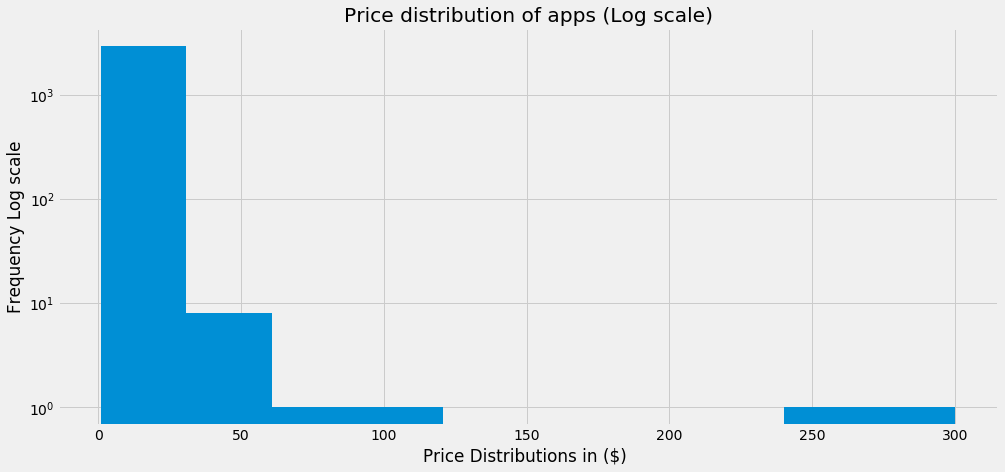

In [97]:
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.hist(paid_apps,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")

# Most of the apps are in the price range 0-40$

## Analyzing number of installs in each price range

- For doing so we will make a table of price interval and the number of installs

In [102]:
paid_apps_table_installs={'0-10$':0,'10-50$':0,'50-100$':0,'100-150$':0,'150$+':0}

for row in ios_data_non_free:
    price=float(row[5])
    if 0 < price <= 10:
        paid_apps_table_installs['0-10$']+=int(row[6])
    elif 10 < price <= 50:
        paid_apps_table_installs['10-50$']+=int(row[6])
    elif 50 < price <= 100:
        paid_apps_table_installs['50-100$']+=int(row[6])
    elif 100 < price <= 150:
        paid_apps_table_installs['100-150$']+=int(row[6])
    elif price > 150:
        paid_apps_table_installs['150$+']+=int(row[6])
        
print(paid_apps_table_installs)
        
# It is obvious from the result the most of the apps are in the interval 0-10$ 
# It is profitable to make an app that lies in this range
    
    

{'0-10$': 12610024, '10-50$': 67836, '50-100$': 1421, '100-150$': 0, '150$+': 814}
